# Compare BH to SExtractor
---

This notebook demonstrates how to reproduce fig.X from [Farrens et al. (2020)](), which compares the blended source classification accuracy of BlendHunter to that of [SExtractor]().

In order to run this script locally, you will need to either [download the final classification results]() or [rerun the scripts to generate these results](). You will also need a Python environment with [Jupyter](), [numpy]() and [matplotlib]() installed.

## Contents

1. [Import Dependencies](#Import-Dependencies)
1. [Plotting Routine](#Plotting-Routine)
1. [Load Results](#Load-Results)
1. [Plot Figure](#Plot-Figure)

## Import Dependencies

In [1]:
from numpy import load
import matplotlib.pyplot as plt

## Plotting Routine

The routine used to generate fig.X from [Farrens et al. (2020)]().

In [2]:
def plot_accuracy(sigma_values, mean_acc_bh, mean_acc_se, std_bh, std_se):
    """Plot Accuracy
    
    Plot classification accuracy as a function of noise standard deviation.
    
    Parameters
    ----------
    sigma_values : numpy.ndarray
        Noise standard deviation values
    mean_acc_bh : numpy.ndarray
        Aaverage BlendHunter classification accuracy values
    mean_acc_se : numpy.ndarray
        Average SExtractor classification accuracy values
    std_bh : numpy.ndarray
        Standard deviation of the BlendHunter classification accuracy values 
    std_se : numpy.ndarray
        Standard deviation of the SExtractor classification accuracy values 
    
    Raises
    ------
    ValueError
        For incompatible array sizes
    
    """
    
    # Check if input arrays are of the same size
    if not all([sigma_values.size == _array.size for _array in (mean_acc_bh, mean_acc_se, std_bh, std_se)]):
        raise ValueError('Input arrays must be of same size.')
        
    # Set figure size
    fig = plt.figure(figsize=(20, 10.5))

    # Plot lines with error bars
    plt.errorbar(sigma_values, mean_acc_bh, yerr=std_bh, color='k', lw=1.5, fmt='-o', elinewidth=1, capsize=5,
                 label='BlendHunter' )
    plt.errorbar(sigma_values, mean_acc_se, yerr=std_se, color='#4190ca', lw=1.5, fmt='--o', elinewidth=1, capsize=5,
                 label='SExtractor')
    
    # Set y-axis limits
    plt.ylim([0.7, 1])

    # Add legend and axis labels
    plt.legend(loc='upper right', shadow=True, fontsize=18)
    plt.title('Average Classification Accuracy', fontsize=20)
    plt.ylabel('Average Accuracy', fontsize=18)
    plt.xlabel('Noise standard deviation ($\sigma$)', fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.grid(True)
    
    # Display figure
    plt.show()

## Load Results

Load the classification accuracy results.

In [3]:
# Set the path to the results
results_path = '../results/'

# Load the results
sigma_values = load(results_path + 'sigmas.npy')
acc_results = load(results_path + 'acc_results.npy')

## Plot Figure

Plot the classification accuracy of BlendHunter compared to that of SExtractor.

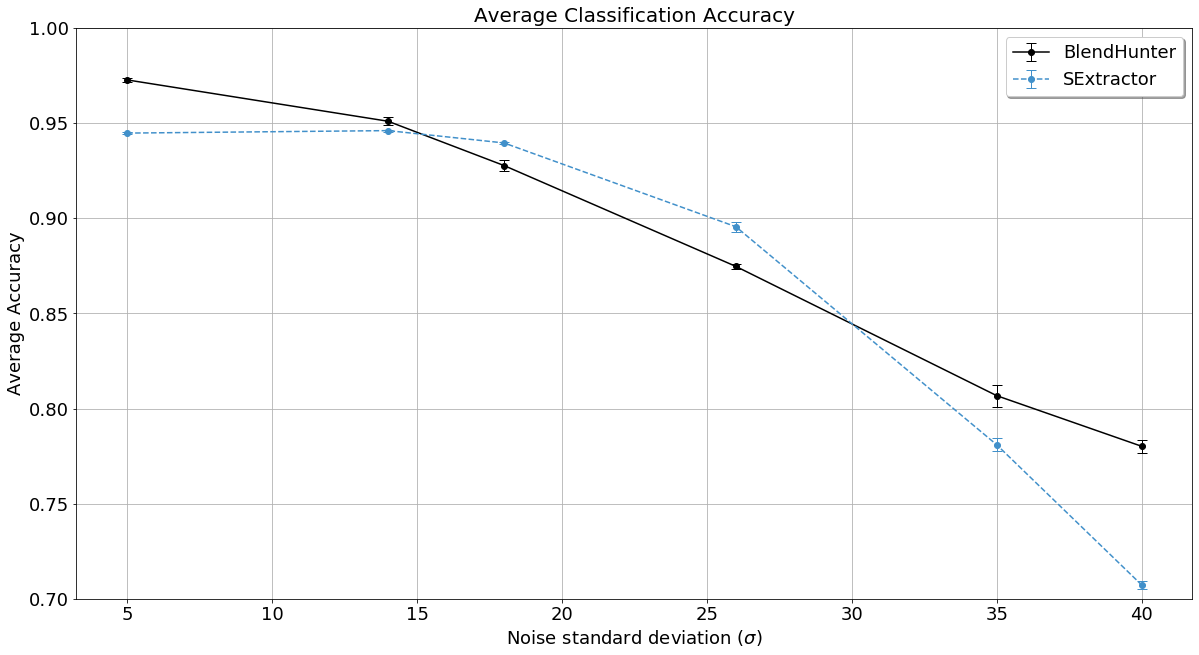

In [4]:
plot_accuracy(sigma_values, *acc_results)